## Importing the packages

In [1]:
import os, random

import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch
from utils import *

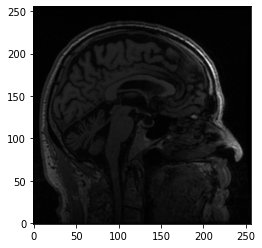

(256, 256, 166)


In [7]:
path = 'Data_Small/'
filename = 'ADNI_002_S_0559_MR_MP-RAGE__br_raw_20060524075551726_1_S14875_I15948.nii'
display(path, filename, 80, sagitall=True)

In [14]:
source = 'Data_Small/'
target = 'Resampled/'
description = pd.read_csv("description.csv")

for path, dirs, files in os.walk(source):
    for filename in files:
        register_and_save(filename, source, description, target, 1.0)

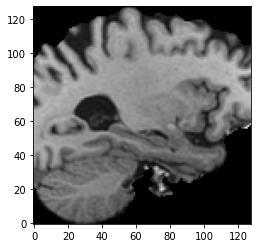

(128, 128, 96)


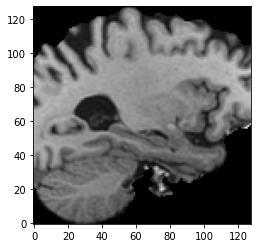

(128, 128, 96)


In [3]:
target = 'Batch/'
path = os.path.join(target, "AD/")
filename = random.choice(os.listdir(path))
filename = 'ADNI_053_S_1044_MR_MP-RAGE__br_raw_20061027160315928_3_S21255_I27782_fcm.nii'

display(path, filename, 20, sagitall=True)

filename_or = 'ADNI_053_S_1044_MR_MP-RAGE__br_raw_20061027160315928_3_S21255_I27782.nii'
display(path, filename_or,  20, sagitall=True)

In [42]:
image = os.path.join(path, filename)
img = sitk.ReadImage(image)
image = sitk.GetArrayFromImage(img)

# define custom transform function
transform = transforms.Compose([
    transforms.ToTensor()
])

# transform the pIL image to tensor
# image
img_tr = transform(image)

img_tr = img_tr * 1.0

mean, std = img_tr.mean([1,2]), img_tr.std([1,2])

mean
len(mean)


166

(array([[50.,  4.,  3., ..., 13.,  7.,  0.],
        [48.,  4.,  5., ..., 10.,  5.,  0.],
        [47.,  6.,  7., ..., 10.,  6.,  0.],
        ...,
        [66.,  1.,  7., ...,  2.,  0.,  0.],
        [67.,  1.,  1., ...,  4.,  0.,  0.],
        [67.,  1.,  1., ..., 10.,  0.,  0.]]),
 array([0.        , 0.13845804, 0.2769161 , 0.4153741 , 0.5538322 ,
        0.6922902 , 0.8307482 , 0.9692063 , 1.1076643 , 1.2461224 ,
        1.3845804 ], dtype=float32),
 <a list of 128 BarContainer objects>)

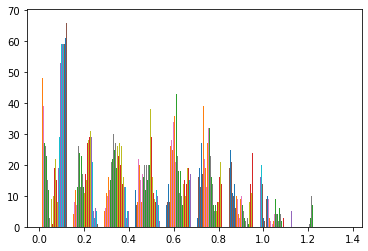

In [6]:
filename = 'ADNI_053_S_1044_MR_MP-RAGE__br_raw_20061027160315928_3_S21255_I27782_fcm.nii'
image = os.path.join(path, filename)
img = sitk.ReadImage(image)
image = sitk.GetArrayFromImage(img)

plt.hist(image[:, :, 50])

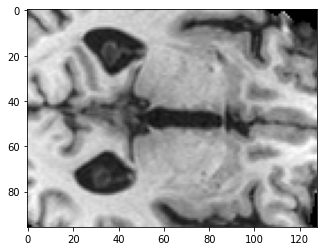

In [2]:
import nibabel as nib
from intensity_normalization.typing import Modality, TissueType
from intensity_normalization.normalize.fcm import FCMNormalize

image = nib.load("Batch/AD/ADNI_053_S_1044_MR_MP-RAGE__br_raw_20061027160315928_3_S21255_I27782.nii").get_fdata()  # assume skull-stripped otherwise load mask too

fcm_norm = FCMNormalize(tissue_type=TissueType.WM)
normalized = fcm_norm(image)


plt.imshow(normalized[:, :, 60], cmap='gray')

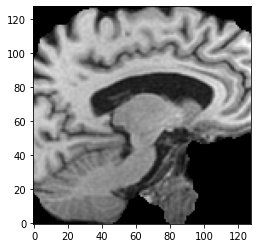

mon gros cul
0.0
941.0
(128, 128, 96)


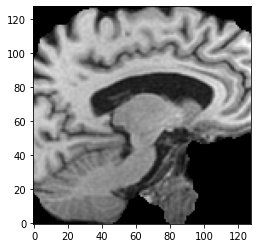

mon gros cul
0.0
1.3979504343702702
(128, 128, 96)


In [3]:
filename = "ADNI_053_S_1044_MR_MP-RAGE__br_raw_20061027160315928_3_S21255_I27782.nii"
path = os.path.join("Batch/AD/")
display(path, filename, 60, sagitall=True )

# make a new instance of the normalizer to normalize a new image, i.e.:
new_image = nib.load("Batch/AD/ADNI_053_S_1044_MR_MP-RAGE__br_raw_20061027160315928_3_S21255_I27782.nii")
fcm_norm = FCMNormalize(tissue_type=TissueType.WM)
normalized = fcm_norm(new_image.get_fdata())

# you can save the normalized image with nibabel as follows:
nib.Nifti1Image(normalized, new_image.affine).to_filename("Batch/AD/normalized.nii")
file="normalized.nii"
display(path, file, 60, sagitall=True )

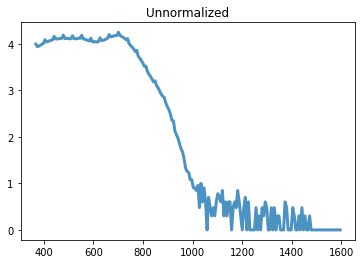

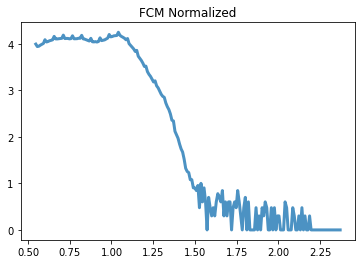

In [26]:
from intensity_normalization.plot.histogram import HistogramPlotter, plot_histogram

new_image = nib.load("Batch/AD/ADNI_053_S_1044_MR_MP-RAGE__br_raw_20061027160315928_3_S21255_I27782.nii").get_fdata()

plot_histogram(new_image)
plt.title("Unnormalized")
plt.show()

plot_histogram(normalized)
plt.title("FCM Normalized")
plt.show()

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import cv2

#img = cv2.imread("Batch/AD/ADNI_053_S_1044_MR_MP-RAGE__br_raw_20061027160315928_3_S21255_I27782_fcm.nii")
#hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(image)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
for x, c, z in zip([h,s,v], ['r', 'g', 'b'], [30, 20, 10]):
    xs = np.arange(256)
    ys = cv2.calcHist([x], [0], None, [256], [0,256])
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys.ravel(), zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

ValueError: too many values to unpack (expected 3)

In [36]:
import pandas as pd
new_data = pd.read_csv("idaSearch_5_19_2022 (1).csv")
new_data = new_data.rename(columns = {'Subject ID' : 'Subject', 'Research Group' : 'Group'})

In [37]:
patient_count = 0
for i in range(len(new_data)):
    if patient != new_data.iloc[i].Subject:
        patient = new_data.iloc[i].Subject
        patient_count = patient_count + 1
    else:
        continue
    diagnosis = new_data[new_data['Subject'] == patient].Group.tolist()
    first_diag = diagnosis[0]
    for diag in diagnosis:
        if diag != first_diag:
            print("ohoh")
            print(patient)



